In [ ]:
Kelompok Mihu-Mihu
Anggota : * Maria Dwi Kurniasih(24083010003)
          * Hizkia Samhan Rezayoshi(24083010019

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Baca data
df = pd.read_csv("Kuesioner (2).csv")
df

output di atas menampilkan seluruh baris dan kolom dari data kuesioner csv, data ini mengenai keaktifan mahasiswa dalam kegiatan kampus terhadap motivasi penyelesaian tugas mata kuliah. 
terdapat beberapa variabel padda data yaitu sebagai berikut:
1. Nama

2. NPM: merupakan nomor pokok mahasiswa

3. Fakultas

4. Jurusan/ proogram studi

5. Semester: semester yang ditempuh saat ini

6. Nomor Telepon

7. IPK: Indeks Prestasi Komulatif

8. MK: MK : Apakah anda mengikuti kegiatan kampus/luar kampus/organisasi/UKM/diluar kampus?

9. JMK : Berapa kali anda mengikuti kegiatan kampus/luar kampus/organisasi/ukm/dalam seminggu?

10. PK : Menurut Anda, seberapa penting mengikuti kegiatan di kampus/luar kampus/organisasi/ukm?

11. Rata-rata (jam) MT : Berapa rata-rata waktu (jam) yang tersedia untuk mengerjakan tugas dalam 1 hari? 
	
12. HMTSD : Berapa hari anda mengerjakan tugas kuliah sebelum deadline?
	
13. MAMT : Apakah kegiatan kampus/luar kampus/organisasi/ukm menganggu aktivitas Anda dalam mengerjakan tugas mata kuliah?

14. JMT : Berapa kali anda menunda mengerjakan tugas mata kuliah dalam seminggu? 
			
		
15.  MMT : Seberapa besar pengaruh kegiatan organisasi/ukm dalam meningkatkan motivasi Anda mengerjakan tugas mata kuliah?

16.  MTDS : Apakah kegiatan di kampus/luar kampus/organisasi/ukm yang Anda ikuti tetap membuat Anda mengerjakan tugas mata kuliah dengan sungguh-sungguh?

17.  KMBDT : Seberapa besar dampak kegiatan kampus/organisasi/ukm terhadap kemampuan mahasiswa bekerja di bawah tekanan dalam mengerjakan tugas mata kuliah?

18. MW : Menurut Anda, apakah aktif kegiatan di kampus/luar kampus/organisasi/ukm dapat meningkatkan wawasan yang dapat diterapkan dalam pengerjaan tugas mata kuliah? 		

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nama                155 non-null    object 
 1   NPM                 155 non-null    int64  
 2   Fakultas            155 non-null    object 
 3   Jurusan             155 non-null    object 
 4   Semester            155 non-null    int64  
 5   Nomor Telepon       155 non-null    object 
 6   IPK                 155 non-null    float64
 7   MK                  155 non-null    object 
 8   JMK                 155 non-null    int64  
 9   PK                  155 non-null    object 
 10  Rata-rata (jam) MT  155 non-null    int64  
 11  HMTSD               155 non-null    int64  
 12  MAMT                155 non-null    object 
 13  JMT                 155 non-null    int64  
 14  MMT                 155 non-null    object 
 15  MTDS                155 non-null    object 
 16  KMBDT   

Output di atas merupakan df.info di library pandas dan ringkasan strukturb DataFrame, Dataframe pada data ini memiliki 155 baris dengan index dari 0 sampai 154, dan terdiri dari 18 kolom. 

Column: nama dari setiap kolom

Non-Null Count: jumlah data tidak kosong (non-null) di kolom tersebuut berjumlah 155, artinya tidak ada missing value.

Dtype: tipe data di setiap kolom 
1. object, biasanya berupa string (teks) seperti, Nama, Fakultas, Jurusan, Nomor Telepon, MK, PK, MAMT, MMT, MTDS, KMBDT, MW.

2. int64, berupa bilangan bulat seperti, NPM, Semester, JMK, Rata-rata (jam) MT, HMTSD, JMT.

3. floatt64, berupa bilangan desimal sepertI IPK. 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NPM,155.0,2.340293e+10,9.971670e+08,2.101101e+10,2.208301e+10,2.403401e+10,2.408101e+10,2.409101e+10
Semester,155.0,4.277419e+00,1.929052e+00,3.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00,9.000000e+00
IPK,155.0,3.682445e+00,3.602428e-01,0.000000e+00,3.600000e+00,3.750000e+00,3.825000e+00,4.000000e+00
JMK,155.0,2.406452e+00,1.789931e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
Rata-rata (jam) MT,155.0,4.400000e+00,2.822912e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,2.400000e+01
HMTSD,155.0,2.625806e+00,1.490874e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
JMT,155.0,1.987097e+00,1.338671e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00


Fungsi ini untuk menampilkan statistik deskriptif DataFrame dengan kolom numerik, .TT untuk transpose agar tabel lebih mudah untuk dibaca (kolom menjadi baris). 

count: jumlah data (selain null). Semua = 155.

mean: rata-rata.

std: standar deviasi (penyebaran data).

min: nilai terkecil.

25%: kuartil 1 (seperempat bawah).

50%: median (nilai tengah).

75%: kuartil 3 (seperempat atas).

max: nilai terbesar.

Penjelasan tiap kolom yang menjadi baris:

1. NPM bukan data analisis utama, hanya sebagai identitas unik mahasiswa.

2. Semester
Mahasiswa berada pada rentang semester 3 hingga 9. Rata-rata semester adalah 4,27, tetapi median berada di semester 7. Hal ini menunjukkan bahwa mayoritas mahasiswa dalam dataset sudah berada pada semester lanjut, meskipun masih terdapat beberapa mahasiswa semester awal.

3. IPK
IPK mahasiswa berkisar antara 1,00 hingga 4,00, dengan rata-rata 3,68 dan median 3,75. Sebagian besar mahasiswa memiliki IPK tinggi, yaitu di atas 3,6. Hal ini menunjukkan performa akademik yang baik secara umum.

4. JMK (Jumlah Mengikuti Kegiatan kampus dalam seminggu)
Jumlah kegiatan kampus yang di ikuti mahasiiswa dalam seminggu berada pada rentang 0 hingga 10 mata kuliah. Rata-rata mahasiswa mengikuti kegiatan kampus 2 - 3 kali dalam seminggu, dengan median 3. Ada sebagian kecil mahasiswa yang tidak mengikuti kegiatan kampus (JMK = 0).


6. Rata-rata (jam) MT, (Waktu yang tersedia untuk mengerjakan tugas dalam satu hari)
Waktu yang dimiliki mahasiswa untuk mengerjakan tugas perhari bervariasi antara 1 hingga 24 jam. Rata-rata jwaktu yang tersedia untuk mengerjakan tugas dalam sehari adalah 4,4 jam dengan median 4 jam. Sebagian besar mahasiswa belajar 3–5 jam. Namun, terdapat data ekstrem (outlier), yaitu mahasiswa yang melaporkan belajar hingga 24 jam.

7. HMTSD (Berapa hari pengerjaan tugas sebelum deadline)
Variabel ini berada pada rentang 0 hingga 7, dengan rata-rata 2,63 dan median 2. Mayoritas mahasiswa mengerjakan tugas 2 hari sebelum deadline.

8. JMT (berapa kali penundaan tugas dalam seminggu yang di lakukan mahasiswa)
Sama seperti HMTSD, JMT juga berada pada skala 0 hingga 7, dengan rata-rata 1,98 dan median 2.kebanyakan mahasiswa menunda mengerjakan tugas 2 kali dalam seminggu.

In [8]:
df.describe(include = 'object')

,Nama,Fakultas,Jurusan,Nomor Telepon,MK,PK,MAMT,MMT,MTDS,KMBDT,MW
count,155,155,155,155,155,155,155,155,155,155,155
unique,155,10,34,151,2,5,2,5,2,5,2
top,Fryan Ilham Satriya,Fakultas Ilmu Komputer,Sains Data,-,Ya,3 = Cukup penting,Tidak,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya
freq,1,49,28,5,134,76,114,80,131,89,138


Fungsi ini menampilkan statistik deskriptif untuk kolom kategorikal (object/string).
Dataset berisi 155 mahasiswa dari 10 fakultas dan 34 jurusan, dengan dominasi Fakultas Ilmu Komputer yang berjumlah 49 responden, dan respondn terbanyak juga dari jurusan Sains Data berjumlah 28 Mahasiswa.

Mayorita mahasiswa menyetujui (MK) yang artinya dalah sebanyak 134 dari 155 mahasiswa mengikuti kegiatan kampus, PK atau mengikuti kegiatan kampus juga dianggap cukup penting oleh mayoritas mahasiswa, lalu 114 mahasiswa mengatakan bahwa mengiukuti kegiatan kampus tidak mengganggu tugas mata kuliah (MMT), Mayoritas mahasiswa juga tetap mengerjakan tugas walaupun tengah mengikuti kegiatan kampus (MTDS), sebanyak 89 mahasiswa mengatakan bahwa dengan mengikuti kegiatan kampus cukup berdampak terhadap kemampuan mengerjakan tugas dibawah tekanan (KMBDT), Mahasiswa juga menyetujui bahwa mengikuti kegiatan kampus bisa menambah wawasan yang dapat diterapkan dalam pengerjaan tugas mata kuliah (MW).

In [10]:
df.isnull().sum().sort_values(ascending=False)

Nama                  0
NPM                   0
KMBDT                 0
MTDS                  0
MMT                   0
JMT                   0
MAMT                  0
HMTSD                 0
Rata-rata (jam) MT    0
PK                    0
JMK                   0
MK                    0
IPK                   0
Nomor Telepon         0
Semester              0
Jurusan               0
Fakultas              0
MW                    0
dtype: int64

Fungsi di atas itu untuk Mengecek apakah setiap sel di DataFrame bernilai null (kosong/NaN).
Hasilnya berupa tabel boolean (True kalau kosong, False kalau ada isi), Menjumlahkan nilai True pada setiap kolom. Karena True = 1, False = 0, hasilnya adalah jumlah nilai kosong di tiap kolom, Mengurutkan hasil jumlah missing value dari yang terbanyak ke yang paling sedikit.

dari hasil output pada  data ini Semua kolom (Nama, NPM, Fakultas, Jurusan, Semester, IPK, Nomor Telepon, dll) memiliki nilai 0. Artinya tidak ada data yang hilang (missing value) pada dataset ini.

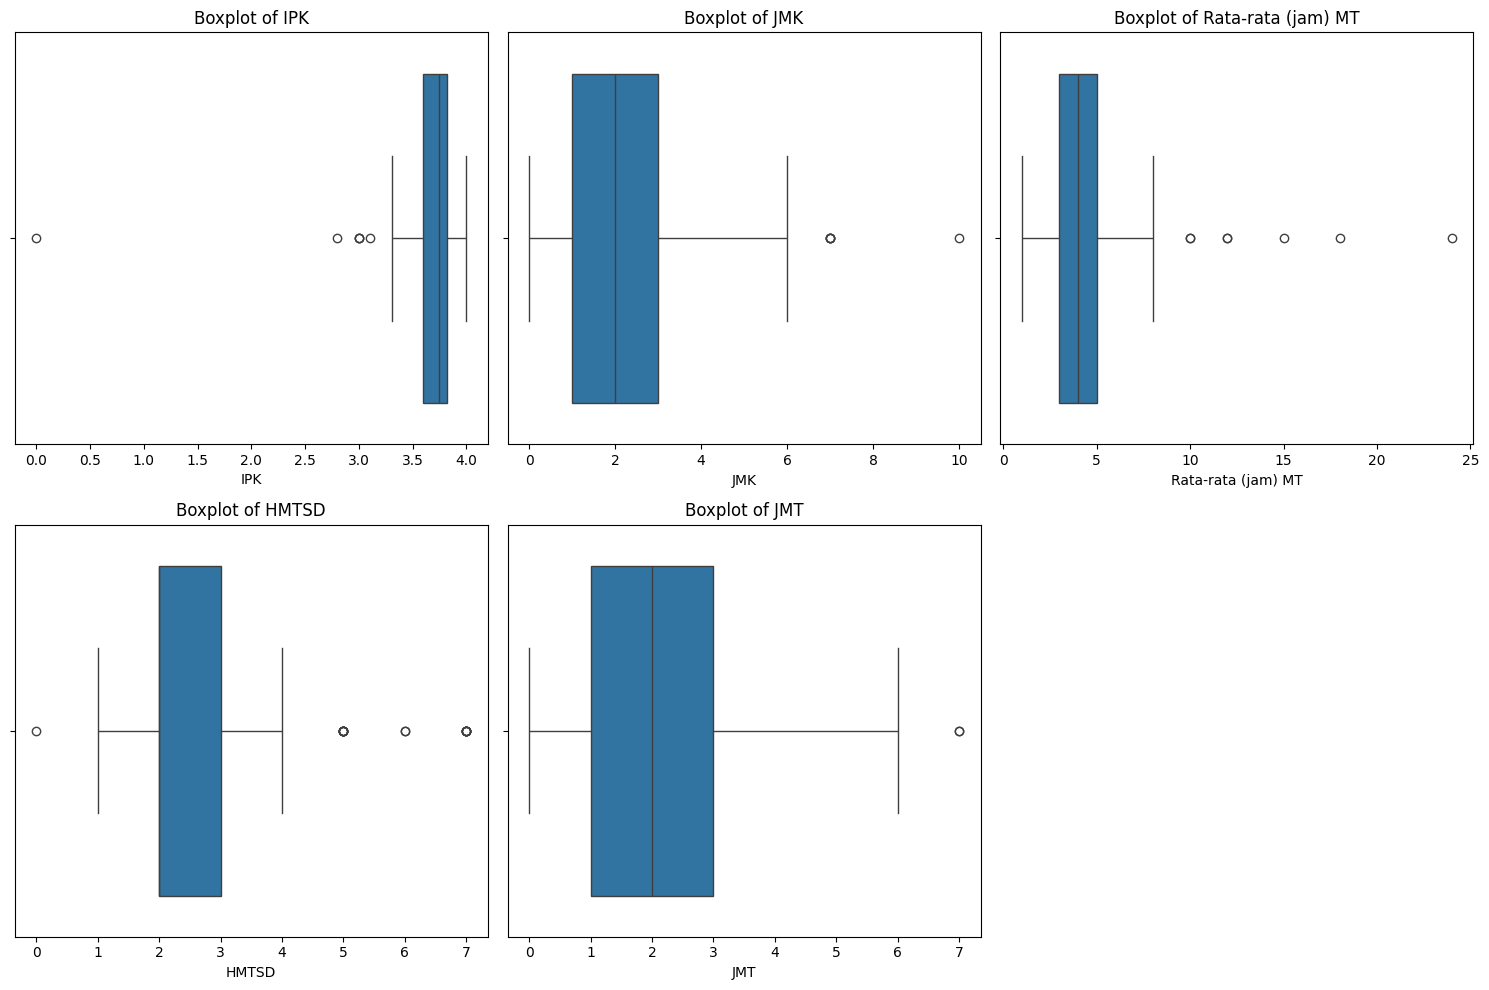

In [12]:
# pilih kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns  

# hapus kolom yang tidak ingin dipakai
numerical_columns = numerical_columns.drop(['NPM', 'Semester'])

# atur ukuran figure (3 kolom per baris)
plt.figure(figsize=(15, 5 * ((len(numerical_columns) + 2) // 3)))

# loop tiap kolom numerik
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


fungsi yang digunalan untuk memilih semua kolom numerik, lalu menghapus NPM dan Semester karena itu identitas/urutan studi, 
tidak relevan untuk boxplot analisis.
Looping untuk membuat boxplot setiap kolom numerik dengan seaborn.boxplot().
Hasilnya boxplot untuk IPK, JMK, Rata-rata jam MT, HMTSD, dan JMT.

1. Boxplot IPK
Sebagian besar data berada antara 3.5 – 4.0, Ada outlier di bawah 1.0 (IPK sangat rendah). 
Secara umum, IPK mahasiswa berada pada kategori cukup tinggi, rata-rata di atas 3,5.
Namun, terdapat sebagian kecil mahasiswa dengan IPK yang sangat rendah sehingga terlihat sebagai nilai ekstrem.

2. Boxplot JMK 
Mayoritas mahasiswa mengikuti 2–4 kali kegiatan kampus dalam seminggu,
Ada beberapa outlier karena ada respinden yang mengisi hingga 10 kali mengikuti kegiatan kampus dalam seminggu.

3. Boxplot Rata-rata (jam) MT
Sebagian besar mahasiswa memiliki waktu yang tersedia untuk mengerjakan tugas 3–6 jam perhari.
Banyak outlier dengan jam pengerjaan tugas di atas 10 jam, bahkan sampai 24 jam.
Hal ini mengindikasikan ada data ekstrem

4. Boxplot HMTSD
mayoritas mahasiswa mengerjakan tugas ada di rentang 2–3 hari sebelum deadline.
Ada outlier di 0, 5, 6, 7.
Distribusi cukup sempit, artinya data cenderung terkonsentrasi di tengah.

5. Boxplot JMT
Mayoritas mahasiswa menunda mengerjakan tugas berada di rentang 1–3 kali dalam seminggu.
Ada outlier di 6–7, karena beberapa mahassiswa menunda mengerjakan tugas hingga 6 sampai 7 kali dalam seminggu..

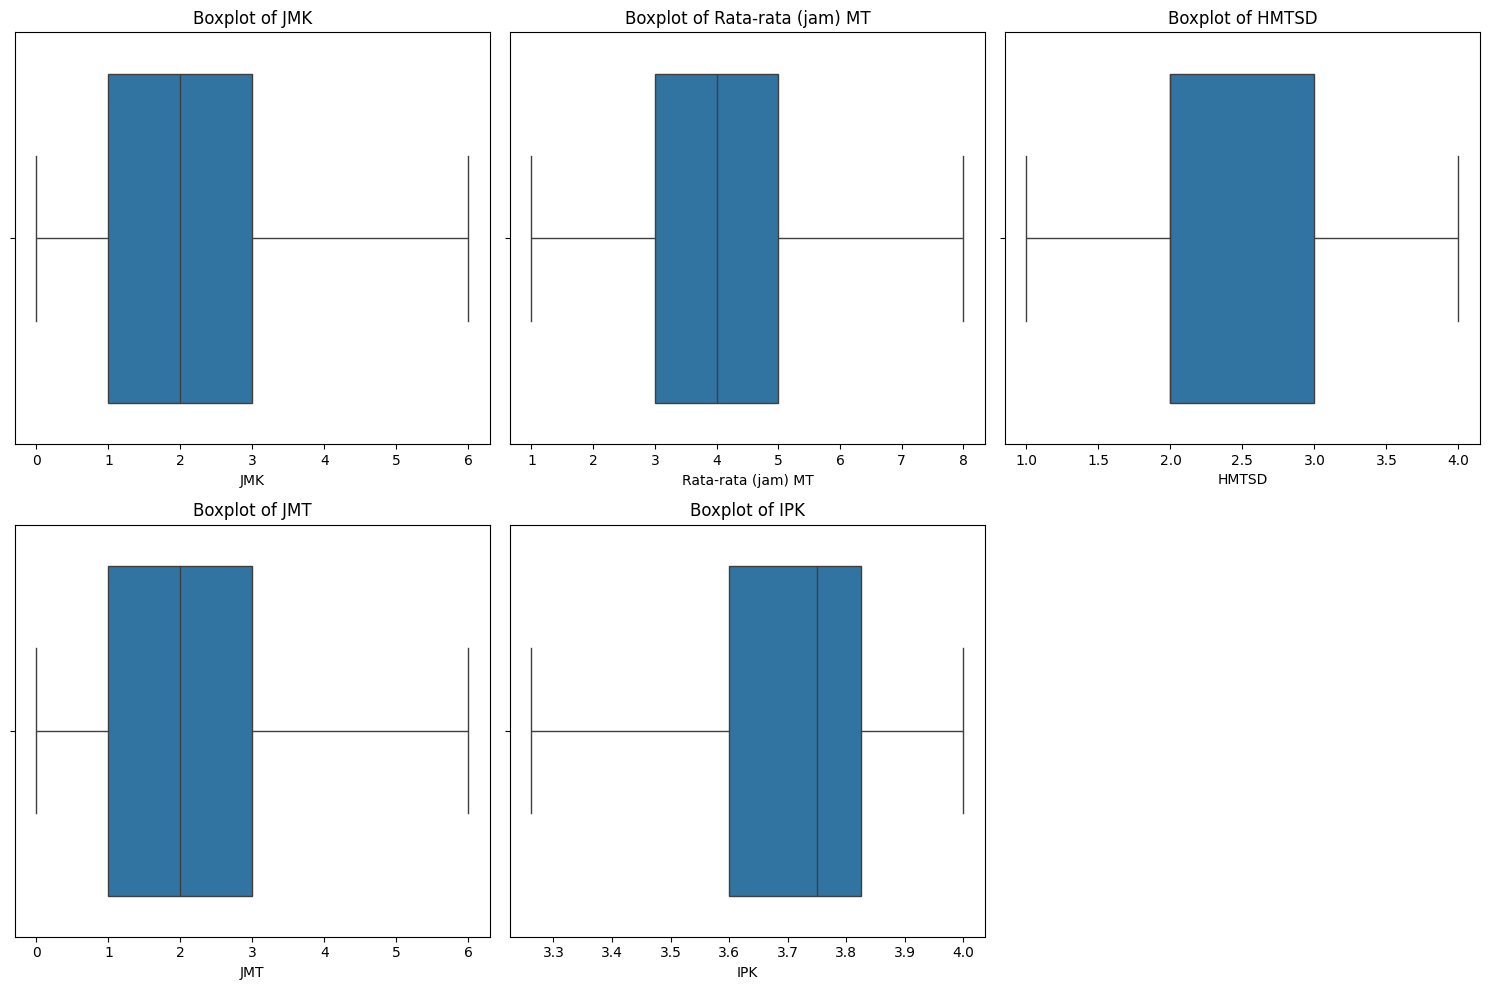

In [14]:
import numpy as np

# --- 1. Pilih kolom numerik kecuali NPM, Semester, dan IPK ---
numerical_columns = df.select_dtypes(include='number').columns.drop(['NPM','Semester','IPK'], errors='ignore')

# --- 2. Imputasi median untuk semua kolom numerik kecuali IPK ---
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = np.where((df[col] < batas_bawah) | (df[col] > batas_atas),
                       median,
                       df[col])

# --- 3. Tangani IPK dengan clipping ---
Q1 = df['IPK'].quantile(0.25)
Q3 = df['IPK'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['IPK'] = df['IPK'].clip(lower=batas_bawah, upper=batas_atas)

# setelah imputasi → buat boxplot semua kolom numerik + IPK
all_numeric = list(numerical_columns) + ['IPK']

plt.figure(figsize=(15, 5 * ((len(all_numeric) + 2) // 3)))

for i, col in enumerate(all_numeric, 1):
    plt.subplot((len(all_numeric) + 2) // 3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Penanganan Outlier dengan Imputasi Median (untuk semua kolom numerik selain IPK)
Untuk setiap kolom numerik:
Dicari Q1, Q3, dan IQR.
Ditentukan batas bawah dan batas atas (Q1 – 1.5×IQR, Q3 + 1.5×IQR).
Nilai yang berada di luar batas ini dianggap outlier.
Outlier diganti (imputasi) dengan nilai median dari kolom tersebut.
Jadi data tetap terisi penuh, tidak ada yang hilang, dan nilai ekstrem diganti dengan nilai representatif (median).

Penanganan Outlier dengan Clipping pada IPK
Khusus IPK, outlier tidak dihapus atau diganti median, melainkan di-clipping.
Jika IPK lebih kecil dari batas bawah  diganti dengan batas bawah, jika IPK lebih besar dari batas atas diganti dengan batas atas. Hal ini dilakukan agar distribusi IPK tetap realistis tanpa mengubah median terlalu banyak.
Visualisasi dengan Boxplot
Setelah proses imputasi dan clipping, dibuat boxplot untuk semua kolom numerik (termasuk IPK).
Boxplot digunakan untuk memastikan bahwa distribusi data sudah lebih stabil, dan outlier ekstrem sudah tidak muncul lagi.

Jadi dalam proses pembersihan data, outlier ditangani dengan dua metode:
Untuk sebagian besar variabel numerik, outlier diganti menggunakan imputasi median, sehingga data tetap utuh namun lebih representatif.
Untuk variabel IPK, outlier ditangani dengan metode clipping, yaitu membatasi nilai agar tetap berada dalam rentang wajar (antara batas bawah dan batas atas).
Setelah penanganan ini, hasil boxplot menunjukkan distribusi data yang lebih bersih dan seimbang tanpa adanya nilai ekstrem yang dapat mengubah atau merusak analisis selanjutnya.

In [16]:
# pilih kolom numerik yang akan distandarisasi
numerical_columns = df.select_dtypes(include='number').columns.drop(['NPM','Semester'], errors='ignore')

# inisialisasi scaler
standard_scaler = StandardScaler()

# lakukan standarisasi
df_std = df.copy()
df_std[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# cek hasil
print("Data setelah standarisasi:")
print(df[numerical_columns].head())


Data setelah standarisasi:
    IPK  JMK  Rata-rata (jam) MT  HMTSD  JMT
0  3.93  1.0                 3.0    2.0  1.0
1  3.67  1.0                 5.0    4.0  4.0
2  3.50  0.0                 2.0    1.0  2.0
3  3.78  2.0                 3.0    2.0  0.0
4  3.93  0.0                 5.0    3.0  3.0


Data mahasiswa yang terdiri dari beberapa variabel numerik seperti IPK, jumlah mata kuliah (JMK), rata-rata jam MT, HMTSD, dan JMT telah dilakukan proses standarisasi. Proses ini bertujuan agar semua variabel berada pada skala yang sama, sehingga tidak ada satu variabel pun yang terlalu dominan hanya karena perbedaan rentang angkanya.

Contohnya, IPK memiliki rentang nilai antara 0 hingga 4, sedangkan rata-rata jam yang tersedia untuk mengerjakan tuga bisa mencapai 20 jam atau lebih. Jika kedua data ini dibandingkan secara langsung tanpa standarisasi, variabel jam belajar akan terlihat lebih besar hanya karena skalanya lebih tinggi.

Dengan standarisasi, setiap variabel diubah sehingga memiliki rata-rata 0 dan penyebaran data (standar deviasi) 1. yang artinya
Nilai positif menunjukkan data lebih tinggi dari rata-rata.
Nilai negatif menunjukkan data lebih rendah dari rata-rata.
Nilai mendekati 0 berarti berada di sekitar rata-rata.
Hasil akhirnya, data menjadi lebih adil untuk dianalisis.

Skewness Before Transformation:
IPK                  -0.765657
JMK                   0.610622
Rata-rata (jam) MT    0.630050
HMTSD                 0.274921
JMT                   0.619348
dtype: float64


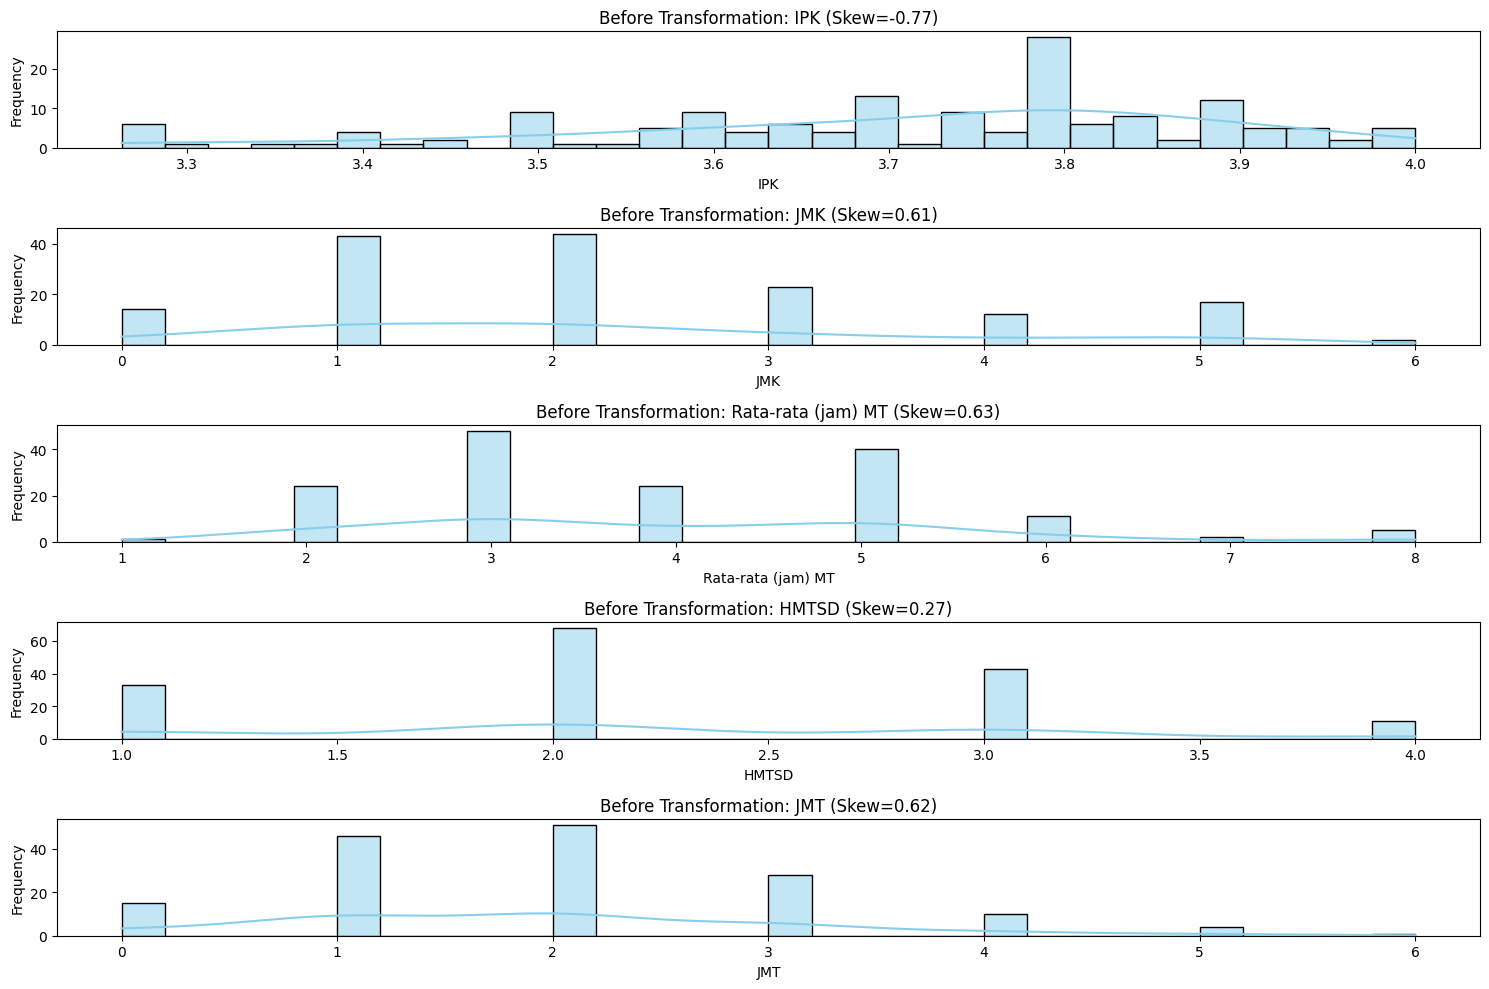

In [18]:
# Hitung skewness sebelum transformasi
skewness_before = df[numerical_columns].skew()
print("Skewness Before Transformation:")
print(skewness_before)

# Visualisasi distribusi sebelum transformasi
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f"Before Transformation: {column} (Skew={skewness_before[column]:.2f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Sebelum dilakukan transformasi, distribusi data pada variabel numerik menunjukkan adanya ketidakseimbangan atau skewness. Pada variabel IPK, nilai skewness sebesar -0,77 menunjukkan bahwa distribusi data condong ke kiri (negatively skewed). Hal ini menandakan bahwa sebagian besar mahasiswa memiliki IPK tinggi mendekati 4, sedangkan yang memiliki IPK lebih rendah jumlahnya relatif sedikit.

pada variabel JMK dan Rata-rata (jam) MT, nilai skewness masing-masing sebesar 0,61 dan 0,63 mengindikasikan distribusi condong ke kanan (positively skewed). Artinya, mayoritas mahasiswa mengikuti kegiatan kampus dan rata-rata jam untuk mengerjakan tugs pada kisaran rendah, namun terdapat sebagian kecil mahasiswa yang mengikuti kegiatan kampus lebih banyak atau lebihb sering, dan mengerjakan tugas dengan rata-rata jam yang jauh lebih tinggi, sehingga data tertarik ke arah kanan.

Variabel HMTSD memiliki nilai skewness 0,27 yang relatif mendekati simetris, sehingga distribusinya lebih seimbang dibandingkan variabel lainnya. Adapun JMT dengan nilai skewness 0,62 juga menunjukkan distribusi condong ke kanan, serupa dengan pola pada JMK dan rata-rata jam MT.

Secara umum, kondisi ini menunjukkan bahwa sebelum dilakukan transformasi, data masih belum sepenuhnya berdistribusi normal. Keberadaan skewness menyebabkan sebagian variabel memiliki distribusi yang tidak seimbang. Jika dibiarkan, hal ini berpotensi mendistorsi hasil analisis, misalnya dengan membuat rata-rata menjadi kurang representatif atau mengurangi akurasi model statistik dan machine learning. Oleh karena itu, diperlukan langkah transformasi data agar distribusi lebih mendekati normal dan hasil analisis menjadi lebih akurat.

Skewness After Transformation:
IPK                  -0.853008
JMK                  -0.397624
Rata-rata (jam) MT   -0.048147
HMTSD                -0.237924
JMT                  -0.561266
dtype: float64


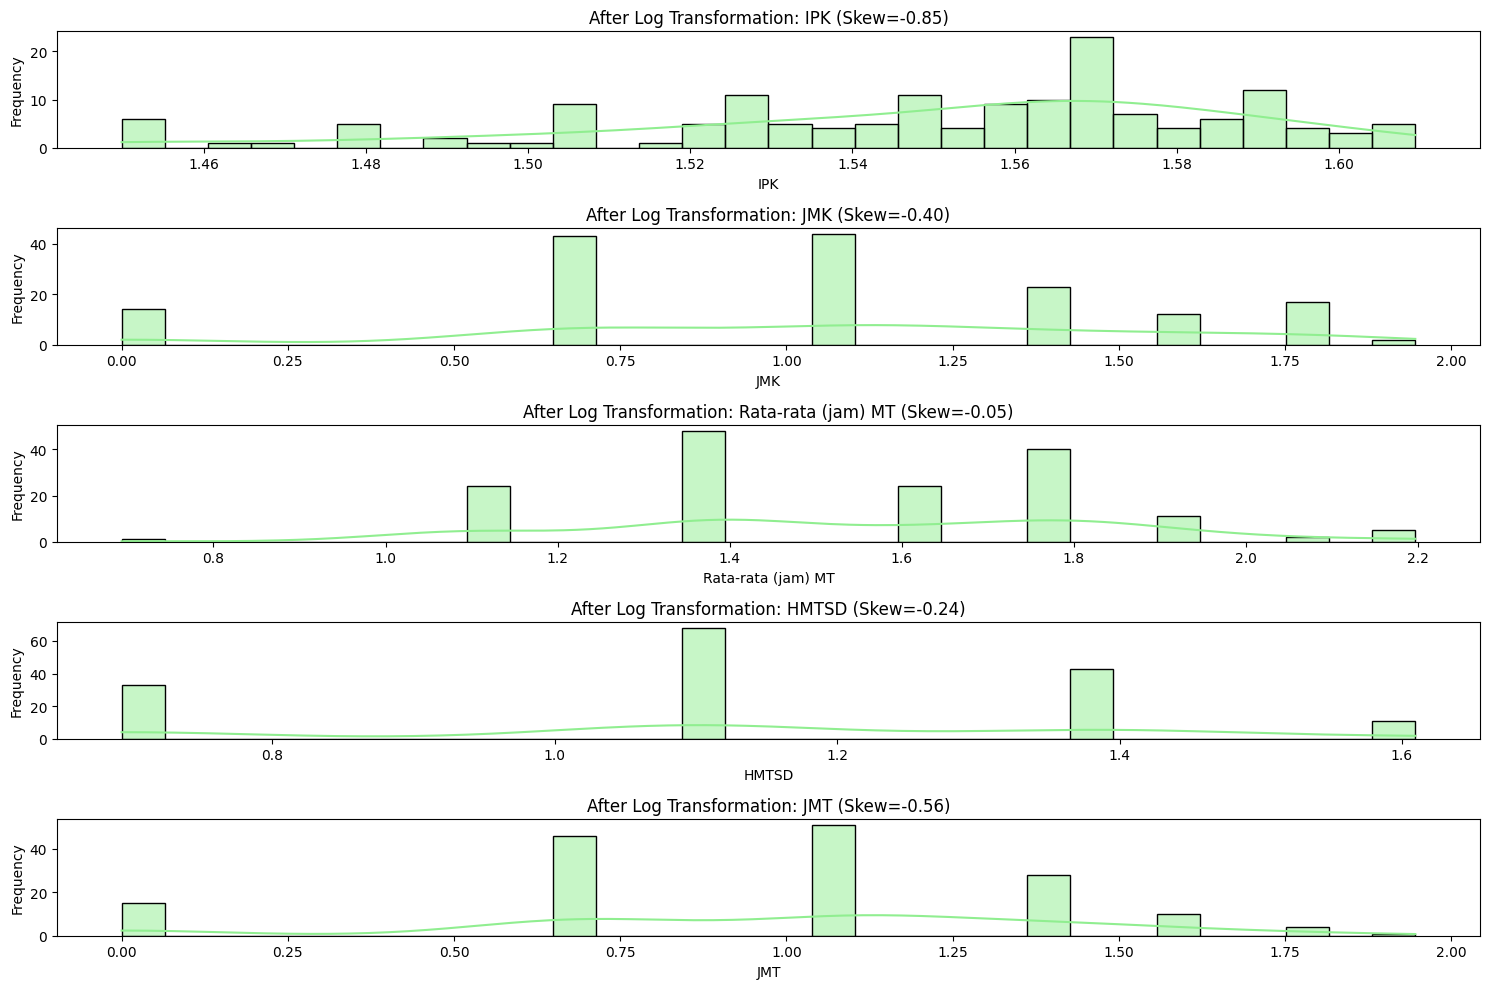

In [20]:
# Lakukan log transformasi (hanya untuk kolom numerik)
df_log = df.copy()
df_log[numerical_columns] = np.log1p(df[numerical_columns].clip(lower=0))  
# clip(lower=0) → supaya nilai negatif jadi 0 (aman untuk log)

# Hitung skewness setelah transformasi
skewness_after = df_log[numerical_columns].skew()
print("Skewness After Transformation:")
print(skewness_after)

# Visualisasi distribusi setelah transformasi
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df_log[column], bins=30, kde=True, color='lightgreen')
    plt.title(f"After Log Transformation: {column} (Skew={skewness_after[column]:.2f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Setelah dilakukan log transformasi, terlihat bahwa nilai skewness pada sebagian besar variabel mengalami perbaikan, artinya distribusi data menjadi lebih mendekati normal.

IPK: Nilai skewness berubah dari -0,77 menjadi -0,85. Walaupun masih cenderung negatively skewed, perubahan ini tidak terlalu besar karena data IPK dari awal memang sudah relatif terkonsentrasi pada nilai tinggi (mendekati 4).

JMK: Skewness turun dari 0,61 menjadi -0,40. Artinya, distribusi yang awalnya condong ke kanan (positively skewed) berhasil diperhalus sehingga lebih simetris.

Rata-rata (jam) MT: Perubahan paling signifikan, dari 0,63 menjadi -0,05. Hasil ini menunjukkan distribusi sudah sangat mendekati normal, karena nilai skewness hampir nol.

HMTSD: Skewness sedikit menurun dari 0,27 menjadi -0,24, sehingga distribusi lebih seimbang walaupun perubahannya tidak terlalu besar.

JMT: Skewness dari 0,62 menjadi -0,56, yang berarti distribusi awalnya condong ke kanan kini lebih terkoreksi dan menjadi relatif lebih normal.

log transformasi membantu menstabilkan sebaran data dan membuat distribusi variabel numerik lebih mendekati normal. Dengan transformasi ini, potensi bias akibat distribusi yang tidak seimbang bisa diminimalkan.

In [22]:
def categorize_ipk(row):
    if row['IPK'] >= 3.51:
        return 'Sangat Baik'
    elif 3.01 <= row['IPK'] <= 3.50:
        return 'Baik'
    elif 2.76 <= row['IPK'] <= 3.00:
        return 'Cukup Baik'
    elif 2.00 <= row['IPK'] <= 2.75:
        return 'Cukup'
    else:
        return 'Kurang'

# Terapkan ke dataset
df['ipk_category'] = df.apply(categorize_ipk, axis=1)
df[['IPK', 'ipk_category']]

,IPK,ipk_category
0,3.9300,Sangat Baik
1,3.6700,Sangat Baik
2,3.5000,Baik
3,3.7800,Sangat Baik
4,3.9300,Sangat Baik
...,...,...
150,3.8000,Sangat Baik
151,3.9100,Sangat Baik
152,3.2625,Baik
153,3.8000,Sangat Baik


fungsi categorize_ipk ini bertujuan untuk mengelompokkan nilai IPK mahasiswa ke dalam kategori tertentu. Proses kategorisasi ini dilakukan berdasarkan interval nilai IPK.

≥ 3.51 = Sangat Baik

3.01 – 3.50 = Baik

2.76 – 3.00 = Cukup Baik

2.00 – 2.75 = Cukup

< 2.00  Kurang

Fungsi ini kemudian diterapkan ke dataset dengan df.apply(...), sehingga pada setiap baris data mahasiswa, nilai IPK mereka otomatis dikategorikan ke dalam label yang sesuai.
Hasilnya terlihat pada output

Mahasiswa dengan IPK 3.93, 3.67, 3.78, 3.91, 3.80 masuk kategori Sangat Baik.
Mahasiswa dengan IPK 3.50 dikategorikan Baik.
Secara keseluruhan, dari 155 data mahasiswa, mayoritas masuk kategori Sangat Baik karena banyak yang memiliki IPK di atas 3.50.

In [25]:
# Buat fungsi kategorisasi JMK
def categorize_jmk(row):
    if row['JMK'] <= 2:
        return 'Rendah'
    elif 3 <= row['JMK'] <= 5:
        return 'Sedang'
    else:
        return 'Tinggi'

# Terapkan ke dataset
df['JMK_category'] = df.apply(categorize_jmk, axis=1)
# Cek hasil
df[['JMK', 'JMK_category']]


,JMK,JMK_category
0,1.0,Rendah
1,1.0,Rendah
2,0.0,Rendah
3,2.0,Rendah
4,0.0,Rendah
...,...,...
150,1.0,Rendah
151,5.0,Sedang
152,0.0,Rendah
153,3.0,Sedang


Rendah = JMK < 2
Mahasiswa jarang ikut kegiatan, hanya 0–1 kali dalam seminggu.

Sedang = 3 ≤ JMK ≤ 5
Mahasiswa cukup aktif, ikut kegiatan 3–5 kali dalam seminggu.

Tinggi = JMK > 5
Mahasiswa sangat aktif, lebih dari 5 kali dalam seminggu ikut kegiatan.

Dari tabel hasil kategorisasi ini, mayoritas mahasiswa masih di kategoi rendah dan sedang.
Artinya sebagian besar mahasiswa ikut kegiatan kampus sekitar 0–5 kali per minggu, belum banyak yang konsisten lebih dari 5 kali.
Ini menggambarkan bahwa tingkat partisipasi mahasiswa cukup variatif: ada yang pasif, ada yang aktif sedang, dan ada juga yang super aktif.

Kategori Rendah = mahasiswa lebih fokus ke akademik/aktivitas pribadi.
Kategori Sedang = mahasiswa cukup seimbang akademik dan organisasi.
Kategori Tinggi = mahasiswa sangat aktif, cenderung punya banyak pengalaman non-akademik.

In [30]:
def categorize_rata_jam_mt(row):
    if row['Rata-rata (jam) MT'] <= 2:
        return 'Sangat Sedikit'
    elif 3 <= row['Rata-rata (jam) MT'] <= 4:
        return 'Cukup'
    elif 5 <= row['Rata-rata (jam) MT'] <= 6:
        return 'Banyak'
    else:
        return 'Sangat Banyak'

# Terapkan ke dataset
df['Rata2_jam_MT_category'] = df.apply(categorize_rata_jam_mt, axis=1)

# Cek hasil
df[['Rata-rata (jam) MT', 'Rata2_jam_MT_category']]

,Rata-rata (jam) MT,Rata2_jam_MT_category
0,3.0,Cukup
1,5.0,Banyak
2,2.0,Sangat Sedikit
3,3.0,Cukup
4,5.0,Banyak
...,...,...
150,3.0,Cukup
151,6.0,Banyak
152,6.0,Banyak
153,8.0,Sangat Banyak


Fungsi categorize_rata_jam_mt(row)

≤ 2 = masuk kategori "Sangat Sedikit"

3–4 jam = "Cukup"

5–6 jam = "Banyak"

6 jam  lebih = "Sangat Banyak"

df.apply(..., axis=1)
Dipakai supaya fungsi tadi diterapkan ke setiap baris di dataframe.
Jadi tiap mahasiswa langsung dapat kategori sesuai jam MT-nya.

Mahasiswa yang punya waktu mengerjakan tugas lebih banyak biasanya bisa lebih siap menyelesaikan tugas tepat waktu, kualitas tugas juga lebih baik.
Sebaliknya, yang kategorinya sangat sedikit mungkin sering keteteran, bisa berdampak ke nilai.


In [34]:
def categorize_hmtsd(value):
    if value <= 1:
        return "Mepet deadline"
    elif 2 <= value <= 3:
        return "Cukup awal"
    else:
        return "Sangat awal"

# Terapkan ke kolom HMTSd
df['hmtsd_category'] = df['HMTSD'].apply(categorize_hmtsd)

# Lihat hasilnya
df[['HMTSD', 'hmtsd_category']]

,HMTSD,hmtsd_category
0,2.0,Cukup awal
1,4.0,Sangat awal
2,1.0,Mepet deadline
3,2.0,Cukup awal
4,3.0,Cukup awal
...,...,...
150,4.0,Sangat awal
151,2.0,Cukup awal
152,4.0,Sangat awal
153,2.0,Cukup awal


Mepet deadline (≤ 1 hari)
Mahasiswa baru memulai mengerjakan tugas sehari sebelum dikumpulkan.

Cukup awal (2–3 hari)
Mulai mengerjakan tugas 2–3 hari sebelum deadline.

Sangat awal (≥ 4 hari)
Mulai mengerjakan tugas jauh-jauh hari sebelum deadline

In [36]:
def categorize_jmt(value):
    if value <= 1:
        return "Jarang menunda"
    elif 2 <= value <= 3:
        return "Cukup sering"
    elif 4 <= value <= 5:
        return "Sering"
    else:
        return "Sangat sering"

# Terapkan ke kolom JMT
df['jmt_category'] = df['JMT'].apply(categorize_jmt)

# Lihat hasil
print(df[['JMT', 'jmt_category']])

     JMT    jmt_category
0    1.0  Jarang menunda
1    4.0          Sering
2    2.0    Cukup sering
3    0.0  Jarang menunda
4    3.0    Cukup sering
..   ...             ...
150  2.0    Cukup sering
151  2.0    Cukup sering
152  0.0  Jarang menunda
153  0.0  Jarang menunda
154  2.0    Cukup sering

[155 rows x 2 columns]


Jarang menunda (≤ 1 kali)
Mahasiswa hampir selalu langsung mengerjakan tugas, tidak suka menunda.

Cukup sering (2–3 kali)
Masih lumayan sering menunda tugas, tapi tidak terlalu parah.

Sering (4–5 kali)
Hampir setiap kali ada tugas, mahasiswa cenderung menunda.

Sangat sering (> 5 kali)
Mahasiswa sangat sering menunda tugas, hampir setiap hari ada saja penundaan.

In [38]:
# Pilih semua kolom kategorikal (object / category)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Buat daftar kolom yang mau dikecualikan
exclude_cols = ['NPM', 'Nama', 'Jurusan', 'Nomor Telepon']

# Buang kolom yang tidak mau dihitung
categorical_columns = [col for col in categorical_columns if col not in exclude_cols]

# Hitung frekuensi kategori per kolom
for col in categorical_columns:
    print(f"Distribusi kategori kolom: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)


Distribusi kategori kolom: Fakultas
Fakultas
Fakultas Ilmu Komputer                      49
Fakultas Ilmu Sosial Budaya dan Politik     42
Fakultas Teknik dan Sains                   36
Fakultas Ekonomi dan Bisnis                  8
Fakultas Ilmu Komputer                       7
Fakultas Hukum                               5
Fakultas Arsitektur dan Desain               4
Fakultas Pertanian                           2
Fakultas Kedokteran                          1
Fakultas Hukum                               1
Name: count, dtype: int64
--------------------------------------------------
Distribusi kategori kolom: MK
MK
Ya       134
Tidak     21
Name: count, dtype: int64
--------------------------------------------------
Distribusi kategori kolom: PK
PK
3  = Cukup penting     76
4  = Penting           56
5  = Penting sekali    13
2  = Kurang penting     9
1  = Tidak penting      1
Name: count, dtype: int64
--------------------------------------------------
Distribusi kategori kolom: MAMT


1. Fakultas

Mahasiswa yang mengisi data paling banyak berasal dari Fakultas Ilmu Komputer (49 orang), disusul oleh Ilmu Sosial Budaya dan Politik (42 orang), serta Teknik dan Sains (36 orang). Ada juga dari fakultas lain seperti Ekonomi dan Bisnis (8 orang), Hukum (5 orang), Arsitektur dan Desain (4 orang), Pertanian (2 orang), dan Kedokteran (1 orang).

2. MK

Sebagian besar mahasiswa menjawab “Ya” (134 orang), artinya mereka aktif ikut kegiatan kampus, sedangkan 21 orang menjawab Tidak. Mayoritas mahasiswa cukup terlibat dalam aktivitas kampus di luar kelas.

3. PK (Pentingnya Kegiatan)

Sebagian besar mahasiswa menilai kegiatan kampus penting (56 orang) atau sangat penting (50 orang). Ada yang menilai cukup penting (26 orang), kurang penting (9 orang), dan hanya 1 orang yang bilang tidak penting.
Jadi, hampir semua mahasiswa melihat kegiatan kampus punya nilai penting, walaupun tingkatnya berbeda.

4. MAMT (Mengganggu Akademik Mahasiswa atau Tidak)

Sebagian besar menjawab Tidak (114 orang), sedangkan 41 orang menjawab Ya.
Artinya, bagi mayoritas mahasiswa, kegiatan kampus tidak terlalu mengganggu akademik, meski ada sebagian yang merasa kegiatan bisa bentrok dengan akademik.

5. MMT (Seberapa Berpengaruh Kegiatan kampus untuk meningkatkan motivasi mahasiswa menyelesaikan tugas mata kuliah)

Kategori terbanyak adalah cukup berpengaruh (80 orang), lalu berpengaruh (26 orang), dan ada juga yang bilang kurang berpengaruh (22 orang) atau tidak berpengaruh (19 orang). Sedikit mahasiswa yang menilai sangat berpengaruh (8 orang).
Jadi, pengaruh kegiatan kampus terhadap motivasi untuk mahasiswa itu ada, tapi kebanyakan dianggap “cukup” saja, tidak sampai ekstrem.

6. MTDS (mengikuti kegiatan kampus dan mengerjakan tugas dengan sungguh-sungguh)
Mayoritas mahasiswa menjawab Ya (131 orang), artinya mereka merasa tbahwa walaupun mengikuti kegiatan lain mereka tetap mengerjakan tugas dengan sungguh-sungguh. Hanya 24 orang menjawab Tidak.

7. KMBDT (kemampuan mahasiswaa bekerja dibawah tekanan)
Sebagian besar menilai kegiatan kampus cukup berdampak untuk membuat mahasiswa bisa bekerja atau mengerjakan tugas dibawah tekanan (89 orang) atau berdampak (41 orang). Ada yang merasa sangat berdampak (11 orang), tapi ada juga yang bilang kurang berdampak (10 orang) dan tidak berdampak (4 orang).

8. MW (meningkatkan wawasan)
Hampir semua mahasiswa menjawab Ya (138 orang), hanya 17 orang yang menjawab Tidak.
Bisa disimpulkan mahasiswa merasa kegiatan kampus bisa meningkatkan wawasan yang dapat diterapkan dalam pengerjan mata kuliah

9. IPK
Sangat Baik : 130 mahasiswa
Baik : 25 mahasiswa

Mayoritas mahasiswa memiliki IPK di kategori “Sangat Baik”, artinya sebagian besar sudah mencapai prestasi akademik tinggi dengan IPK ≥ 3,51.
Hanya sebagian kecil mahasiswa (25 orang) yang ada di kategori “Baik” (IPK 3,01 – 3,50).
sehingga bisa disimpulkan bahwa kualitas akademik mahasiswa pada dataset ini sangat baik secara keseluruhan.

10. JMK
di dalam variabel ini terdapat 3 kategori yaitu rendah (101), sedang (52), dan tinggi (2). Dapat disimpulkan bahwa mahasiswa rata-rata hanya mengikuti kegiatan kampus sesakli dalam kurunn waktu satu minggu

11. Rata-rata jam MT
Cukup             72
Banyak            51
Sangat Sedikit    25
Sangat Banyak      7
artinyta rata-rat mahasiswa memiliki cukup waktu untuk mengerjakan satu tugas dalam sehari.

12. hmtsd
HMTSD ini memiliki tiga kategori tentang mengerjakan tugas sebelum deadline Cukup awal (111), Mepet deadline (33) Sangat awal (11). Jadi rata-rata mahasiswa upn mengerjakan tugas itu cukup awal sebelum deadline.

13. JMT
Pada variabel JMT ini adalah tentang berapa kali mahasiswa menunda mengerjakan tugas dalam satu minggu, terbagi dalam 4 kategori yaitu: Cukup sering (79), Jarang menunda (61), Sering (14), Sangat sering  (1). Jadi kebanyakan mahasiswa seringkali menunda dalam pengerjaan tugas

In [60]:
# --- PK: Tingkat kepentingan ---
mapping_pk = {
    '1  = Tidak penting' : 'Kurang penting',
    '2  = Kurang penting': 'Kurang penting',
    '3  = Cukup penting' : 'Cukup penting',
    '4  = Penting'       : 'Penting',
    '5  = Penting sekali': 'Penting sekali'
}
df['PK_grouped'] = df['PK'].replace(mapping_pk)

# --- MMT: Tingkat pengaruh menunda ---
mapping_mmt = {
    '1  = Tidak berpengaruh' : 'Tidak/Kurang berpengaruh',
    '2  = Kurang Berpengaruh': 'Tidak/Kurang berpengaruh',
    '3  = Cukup berpengaruh' : 'Cukup berpengaruh',
    '4  = Berpengaruh'       : 'Berpengaruh',
    '5  = Sangat Berpengaruh': 'Sangat berpengaruh'
}
df['MMT_grouped'] = df['MMT'].replace(mapping_mmt)

# --- KMBDT: Dampak menunda sebelum deadline ---
mapping_kmbdt = {
    '1 = Tidak berdampak'  : 'Tidak/Kurang berdampak',
    '2 = Kurang berdampak' : 'Tidak/Kurang berdampak',
    '3 = Cukup berdampak'  : 'Cukup berdampak',
    '4 = Berdampak'        : 'Berdampak',
    '5 = Sangat Berdampak' : 'Sangat berdampak'
}
df['KMBDT_grouped'] = df['KMBDT'].replace(mapping_kmbdt)

# --- JMT: Kebiasaan menunda ---
mapping_jmt = {
    'Sangat sering' : 'Sering',
    'Sering'        : 'Sering',
    'Cukup sering'  : 'Cukup sering',
    'Jarang menunda': 'Jarang menunda'
}
df['JMT_grouped'] = df['jmt_category'].replace(mapping_jmt)

# --- HMTSD: Hari mengerjakan tugas sebelum deadline ---
mapping_hmtsd = {
    'Sangat awal'   : 'Awal',
    'Cukup awal'    : 'Awal',
    'Mepet deadline': 'Mepet deadline'
}
df['HMTSD_grouped'] = df['hmtsd_category'].replace(mapping_hmtsd)

for col in ['PK_grouped','MMT_grouped','KMBDT_grouped','JMT_grouped','HMTSD_grouped']:
    print(df[col].value_counts())
    print('-'*50)


PK_grouped
Cukup penting     76
Penting           56
Penting sekali    13
Kurang penting    10
Name: count, dtype: int64
--------------------------------------------------
MMT_grouped
Cukup berpengaruh           80
Tidak/Kurang berpengaruh    41
Berpengaruh                 26
Sangat berpengaruh           8
Name: count, dtype: int64
--------------------------------------------------
KMBDT_grouped
Cukup berdampak           89
Berdampak                 41
Tidak/Kurang berdampak    14
Sangat berdampak          11
Name: count, dtype: int64
--------------------------------------------------
JMT_grouped
Cukup sering      79
Jarang menunda    61
Sering            15
Name: count, dtype: int64
--------------------------------------------------
HMTSD_grouped
Awal              122
Mepet deadline     33
Name: count, dtype: int64
--------------------------------------------------


1. PK (Pentingnya Kegiatan)
Sebagian besar mahasiswa menilai kegiatan kampus cukup penting (76 orang) dan penting (56 orang). Hanya sebagian kecil yang menilai kegiatan ini sangat penting (13 orang) maupun kurang penting (10 orang). Hal ini menunjukkan bahwa kegiatan kampus dipandang memiliki nilai, meskipun intensitas kepentingannya lebih sering dianggap sedang.

2. MMT (Seberapa Mempengaruhi Kegiatan Kampus terhadap Motivasi Tugas)
Kategori terbanyak adalah cukup berpengaruh (80 orang), diikuti oleh tidak/kurang berpengaruh (41 orang). Ada pula yang menilai kegiatan kampus berpengaruh (26 orang) dan sangat berpengaruh (8 orang). Dengan demikian, kegiatan kampus dianggap memberi pengaruh motivasional, walaupun tidak sampai pada tingkat maksimal.

3. KMBDT (Kemampuan Mahasiswa Bekerja di Bawah Tekanan)
Mayoritas responden menilai kegiatan kampus cukup berdampak (89 orang) dan berdampak (41 orang) terhadap kemampuan mereka bekerja di bawah tekanan. Hanya sedikit yang menilai tidak/kurang berdampak (14 orang) atau sangat berdampak (11 orang). Artinya, kegiatan kampus dipersepsikan mampu melatih mahasiswa menghadapi tekanan, meskipun tidak selalu signifikan.

4. JMT (Kebiasaan Menunda Tugas)
Sebagian besar mahasiswa menyatakan cukup sering menunda tugas (79 orang), sementara 61 orang jarang menunda, dan hanya 15 orang yang sering menunda. Hal ini mengindikasikan bahwa kecenderungan menunda memang ada, namun sebagian besar berada pada kategori sedang.

5. HMTSD (Hari Mengumpulkan Tugas Sebelum Deadline)
Mayoritas mahasiswa mengumpulkan tugas lebih awal (122 orang), sedangkan 33 orang mengumpulkan tugas mepet deadline. Temuan ini memperlihatkan bahwa meskipun kebiasaan menunda ada, sebagian besar mahasiswa tetap berusaha menyelesaikan tugas jauh sebelum batas waktu.

In [98]:
import pandas as pd

# daftar kolom kategori yang sudah final (sesudah digabung)
categorical_cols = ["PK_grouped", "MMT_grouped", "KMBDT_grouped", "ipk_category", "HMTSD_grouped", "JMT_grouped", "MK", "MAMT", "MTDS", "MW", "Rata2_jam_MT_category", "JMK_category"]

for col in categorical_cols:
    print(f"=== Dummy Mapping untuk variabel: {col} ===")
    
    categories = df[col].dropna().unique()
    n_cat = len(categories)
    
    if n_cat == 2:
        # kalau 2 kategori → tampilkan 2 dummy
        dummy_cols = [f"{col}_dummy{i+1}" for i in range(n_cat)]
    else:
        # kalau >2 kategori → tampilkan k-1 dummy
        dummy_cols = [f"{col}_dummy{i+1}" for i in range(n_cat-1)]
    
    mapping = []
    for i, cat in enumerate(categories):
        row = {"Kategori": cat}
        for j, dummy in enumerate(dummy_cols):
            row[dummy] = 1 if i == j else 0
        mapping.append(row)
    
    mapping_df = pd.DataFrame(mapping)
    display(mapping_df)
    print("\n")


=== Dummy Mapping untuk variabel: PK_grouped ===


,Kategori,PK_grouped_dummy1,PK_grouped_dummy2,PK_grouped_dummy3
0,Cukup penting,1,0,0
1,Kurang penting,0,1,0
2,Penting,0,0,1
3,Penting sekali,0,0,0




=== Dummy Mapping untuk variabel: MMT_grouped ===


,Kategori,MMT_grouped_dummy1,MMT_grouped_dummy2,MMT_grouped_dummy3
0,Tidak/Kurang berpengaruh,1,0,0
1,Berpengaruh,0,1,0
2,Cukup berpengaruh,0,0,1
3,Sangat berpengaruh,0,0,0




=== Dummy Mapping untuk variabel: KMBDT_grouped ===


,Kategori,KMBDT_grouped_dummy1,KMBDT_grouped_dummy2,KMBDT_grouped_dummy3
0,Berdampak,1,0,0
1,Cukup berdampak,0,1,0
2,Tidak/Kurang berdampak,0,0,1
3,Sangat berdampak,0,0,0




=== Dummy Mapping untuk variabel: ipk_category ===


,Kategori,ipk_category_dummy1,ipk_category_dummy2
0,Sangat Baik,1,0
1,Baik,0,1




=== Dummy Mapping untuk variabel: HMTSD_grouped ===


,Kategori,HMTSD_grouped_dummy1,HMTSD_grouped_dummy2
0,Awal,1,0
1,Mepet deadline,0,1




=== Dummy Mapping untuk variabel: JMT_grouped ===


,Kategori,JMT_grouped_dummy1,JMT_grouped_dummy2
0,Jarang menunda,1,0
1,Sering,0,1
2,Cukup sering,0,0




=== Dummy Mapping untuk variabel: MK ===


,Kategori,MK_dummy1,MK_dummy2
0,Ya,1,0
1,Tidak,0,1




=== Dummy Mapping untuk variabel: MAMT ===


,Kategori,MAMT_dummy1,MAMT_dummy2
0,Tidak,1,0
1,Ya,0,1




=== Dummy Mapping untuk variabel: MTDS ===


,Kategori,MTDS_dummy1,MTDS_dummy2
0,Ya,1,0
1,Tidak,0,1




=== Dummy Mapping untuk variabel: MW ===


,Kategori,MW_dummy1,MW_dummy2
0,Ya,1,0
1,Tidak,0,1




=== Dummy Mapping untuk variabel: Rata2_jam_MT_category ===


,Kategori,Rata2_jam_MT_category_dummy1,Rata2_jam_MT_category_dummy2,Rata2_jam_MT_category_dummy3
0,Cukup,1,0,0
1,Banyak,0,1,0
2,Sangat Sedikit,0,0,1
3,Sangat Banyak,0,0,0




=== Dummy Mapping untuk variabel: JMK_category ===


,Kategori,JMK_category_dummy1,JMK_category_dummy2
0,Rendah,1,0
1,Sedang,0,1
2,Tinggi,0,0


1. PK_grouped (Pentingnya Kegiatan)

* Terdiri dari 4 kategori.

* Dummy dibuat 3 kolom, sehingga “Penting sekali” menjadi baseline (semua nol).

* Artinya, kategori lain dibandingkan terhadap “Penting sekali”.

2. MMT_grouped (Pengaruh Kegiatan Kampus terhadap Motivasi)

* 4 kategori, dibuat 3 dummy.

* “Sangat berpengaruh” menjadi baseline.

* Jadi “Tidak/Kurang berpengaruh”, “Berpengaruh”, dan “Cukup berpengaruh” diukur relatif terhadap “Sangat berpengaruh”.

3. KMBDT_grouped (Kemampuan Mahasiswa Bekerja di Bawah Tekanan)

* 4 kategori, dibuat 3 dummy.

* “Sangat berdampak” menjadi baseline.

* Artinya, analisis regresi akan membandingkan “Berdampak”, “Cukup berdampak”, dan “Tidak/Kurang berdampak” terhadap “Sangat berdampak”.

4. ipk_category (IPK)

* 2 kategori: “Sangat Baik” dan “Baik”.

* Dibuat 2 dummy, sehingga tidak ada baseline netral.

* “Sangat Baik” bernilai (1,0) dan “Baik” bernilai (0,1).

5. HMTSD_grouped (Hari Mengumpulkan Tugas Sebelum Deadline)

* 2 kategori: “Awal” dan “Mepet deadline”.

* Dibuat 2 dummy, sehingga keduanya eksklusif.

6. JMT_grouped (Kebiasaan Menunda Tugas)

* 3 kategori.

* Dibuat 2 dummy, dengan “Cukup sering” sebagai baseline (semua nol).

* Jadi model akan melihat perbedaan antara “Jarang menunda” dan “Sering” dibanding “Cukup sering”.

7. MK (Mengikuti Kegiatan Kampus)

* 2 kategori: “Ya” dan “Tidak”.

* “Ya” bernilai (1,0), “Tidak” bernilai (0,1).

8. MAMT (Mengganggu Akademik Mahasiswa atau Tidak)

* 2 kategori: “Tidak” dan “Ya”.

* “Tidak” bernilai (1,0), “Ya” bernilai (0,1).

9. MTDS (Mengikuti Tugas dengan Sungguh-Sungguh)

* 2 kategori: “Ya” dan “Tidak”.

* “Ya” bernilai (1,0), “Tidak” bernilai (0,1).

10. MW (Meningkatkan Wawasan)

* 2 kategori: “Ya” dan “Tidak”.

* “Ya” bernilai (1,0), “Tidak” bernilai (0,1).

11. Rata2_jam_MT_category (Rata-rata Jam Mengerjakan Tugas)

* 4 kategori: “Cukup”, “Banyak”, “Sangat Sedikit”, “Sangat Banyak”.

* Dibuat 3 dummy → “Sangat Banyak” sebagai baseline.

* Jadi perbandingan dilakukan terhadap mahasiswa yang jam belajarnya paling tinggi.

12. JMK_category (Jumlah Mata Kuliah)

* 3 kategori: Rendah, Sedang, Tinggi.

* Dibuat 2 dummy → “Tinggi” sebagai baseline.

* Jadi “Rendah” dan “Sedang” dibandingkan dengan “Tinggi”.